# Promoter Tests 1

In this experiment, we have tried three different candidate promoters: Arabinose, Lac (via IPTG) annd Rhamnose

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt



## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

ColumnNames = {
    'A' : "NoPlasmid",
    'B' : "+control",
    'C' : "ZeroC",
    'D' : "C1",
    'E' : "C2",
    'F' : "C3",
    'G' : "C4",
    'H' : "C5",
}

MeaningColNames = { v: k for k, v in ColumnNames.items()}

def allCols(labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

### Reading measurements

In [2]:
# Indexes of promoters
Pidxs = ['rha', 'ara', 'iptg']
Pcolors = {'rha' : (0.3,0.5,1.0), 'ara' : (1.0,0.5,0.3), 'iptg' : (0.5,1.0,0.3)}
Pcolors_light = {'rha' : (0.5,0.7,1.0), 'ara' : (1.0,0.7,0.5), 'iptg' : (0.7,1.0,0.5)}

FLlist = {}
tidx = {}
for P in Pidxs: 
    FLlist[P] = []
    tidx[P] = []

for P in Pidxs:
    for file in glob.glob(P + "/T1*.txt"):
        tidx[P].append( float( file.split(' ')[2].split('.')[0] ) )
        FLlist[P].append(file)

for P in Pidxs: 
    Idx = np.argsort(tidx[P])
    FLlist[P] = np.array(FLlist[P])[Idx]

ODlist = []
for j in range(10):
    ODlist.append("OD/OD "+str(j)+".txt")

Let now read the data. In this experiment, we have recordings from two different wavelengths, regarding Gfp and Rfp proteins. Let's start reading GFP.

In [3]:
fldata = {}
for P in Pidxs:
    fldata[P] = LabLib.ReadFluor_timefmt_nanomed(FLlist[P])

fldata['rha'][allCols('NoPlasmid')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,961.853,872.115,1037.091,791.863,829.987,784.138,832.372,979.768,1083.478
1,967.806,879.522,1093.976,838.641,938.684,1045.627,895.709,913.244,1119.971
2,952.276,911.555,984.746,785.018,868.509,865.920,887.832,969.730,1085.725


Next, we read the Rfp data.

In [4]:
fldata_rfp = {}
for P in Pidxs:
    fldata_rfp[P] = LabLib.ReadFluor_timefmt_nanomed(FLlist[P], datarow=2)

fldata_rfp['rha'][allCols('NoPlasmid')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,2081.229,2401.376,2908.164,1948.513,2184.924,2105.203,2205.392,2859.949,3078.705
1,2160.291,2234.220,3203.614,2171.314,2743.154,3018.753,2529.405,2891.294,3239.890
2,2219.363,2499.393,3035.210,2104.095,2437.152,2113.526,2507.385,3143.899,3112.172


Since we have three different plates, one for each promoter, let's quickly check the temperature in each plate separately.

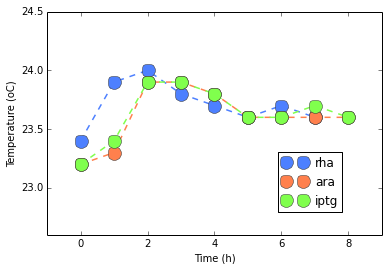

In [5]:
for P in Pidxs:
    pl.plot(fldata[P]['T(oC)'], 'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Temperature (oC)')
pl.ylim(22.6,24.5)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Temperature seems quite reasonable accross different boards.

### OD measurements

In [6]:
oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)

# Fixing experimental error
oddata['H06'] = oddata['H10']

In [7]:
# Board configuration
ODorganization = {
    '+control'  : ['A05', 'A06', 'A07'],
    'ara'  : ['A08', 'A09', 'A10'],
    'iptg' : ['A11', 'A12', 'B01'],
    'rha'  : ['B02', 'B03', 'B04'],
    }

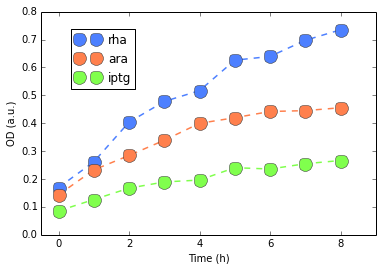

In [8]:
for P in Pidxs:
    pl.plot(np.mean(np.array(oddata[ODorganization[P]]), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.3, 0.95))
pl.show()
pl.show()

### Baselines: +control and NoPlasmid

Baseline for rha:	   928 a.u.
Baseline for ara:	   863 a.u.
Baseline for iptg:	   888 a.u.


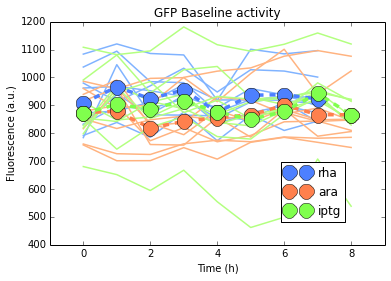

In [9]:
for P in Pidxs:
    pl.plot(fldata[P][allCols('NoPlasmid')], color=Pcolors_light[P], lw=1.5)

for P in Pidxs:
    pl.plot(np.mean(np.array( fldata[P][allCols('NoPlasmid')] ), axis=1), 
            'o--', color=Pcolors[P], lw=3.5, markersize=15, label=P)
    
    print "Baseline for " + P + ":\t %5.0f a.u." % \
    (np.mean(np.array( fldata[P][allCols('NoPlasmid')] ), axis=1).mean())


pl.title('GFP Baseline activity')
pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Fluorescence (a.u.)')
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Gfp baseline activity seems to be around 900 a.u. for all three plates.

Baseline for rha:	  2591 a.u.
Baseline for ara:	  2084 a.u.
Baseline for iptg:	  2236 a.u.


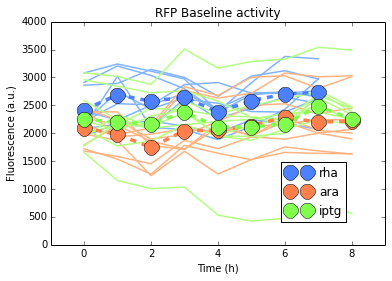

In [10]:
for P in Pidxs:
    pl.plot(fldata_rfp[P][allCols('NoPlasmid')], color=Pcolors_light[P], lw=1.5)

for P in Pidxs:
    pl.plot(np.mean(np.array( fldata_rfp[P][allCols('NoPlasmid')] ), axis=1), 
            'o--', color=Pcolors[P], lw=3.5, markersize=15, label=P)
    
    print "Baseline for " + P + ":\t %5.0f a.u." % \
    (np.mean(np.array( fldata_rfp[P][allCols('NoPlasmid')] ), axis=1).mean())

pl.title('RFP Baseline activity')
pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Fluorescence (a.u.)')
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Rfp baseline activity may vary quite a bit accross plates. This might be related to different leak strengths.

Blue   = Rha
Orange = Ara
Green  = IPTG


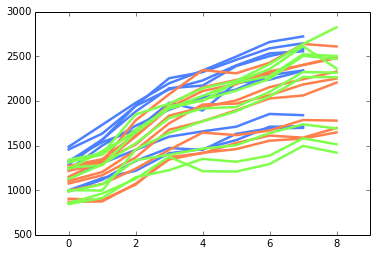

In [11]:
print 'Blue   = Rha'
print 'Orange = Ara'
print 'Green  = IPTG'

for P in Pidxs:
    pl.plot(fldata[P][allCols('+control')], color=Pcolors[P], lw=2.5)

pl.xlim(-1,9)
pl.show()

Rhamnose seems to be the stronger promoter to the positive control. It looks like a clear sign in this direction. Let's now take a look at the average value as function of time.

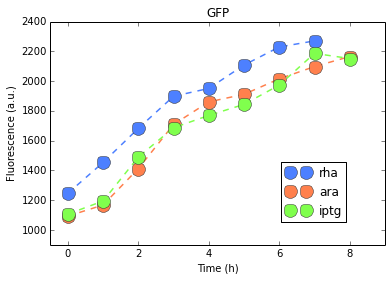

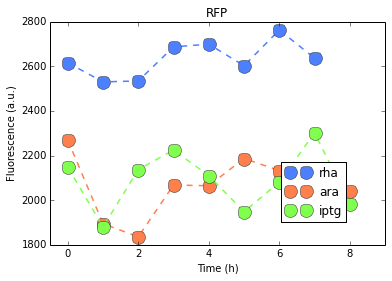

In [12]:
for P in Pidxs:
    pl.plot(np.mean(np.array( fldata[P][allCols('+control')] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.title('GFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Fluorescence (a.u.)')
pl.ylim(900,2400)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()


for P in Pidxs:
    pl.plot(np.mean(np.array( fldata_rfp[P][allCols('+control')] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.title('RFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Fluorescence (a.u.)')
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Just to have an idea of the order of the fluorescence differences, let's evaluate the average difference between Arabinose and Rhamnose.

In [13]:
ZC_rha  = np.mean(np.array(fldata['rha'][allCols('+control')]), axis=1)[:8]
ZC_ara  = np.mean(np.array(fldata['ara'][allCols('+control')]), axis=1)[:8]
print "Rha - Ara  =  %5.1f" % ( np.abs( ZC_rha - ZC_ara  ).mean() )

Rha - Ara  =  196.6


### Quick check on the zero-concentration data


Next, let's see how is the zero-concentration evolving.

In [14]:
Normd = {}
Normd_rfp = {}
for P in Pidxs:
    Normd[P] = fldata[P][allCols('ZeroC')]/oddata[ODorganization[P]].mean().mean()
    Normd_rfp[P] = fldata_rfp[P][allCols('ZeroC')]/oddata[ODorganization[P]].mean().mean()

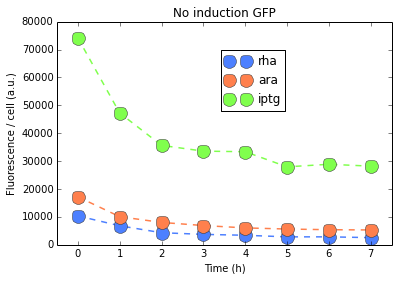

In [15]:
for P in Pidxs:
    pl.plot(np.mean(np.array(Normd[P][allCols('ZeroC')])[:8], axis=1) / 
            np.mean(np.array( oddata[ODorganization[P]][:8] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.title('No induction GFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,7.5)
pl.ylabel('Fluorescence / cell (a.u.)')
#pl.ylim(700,1400)
pl.legend(bbox_to_anchor=(0.7, 0.9))
pl.show()

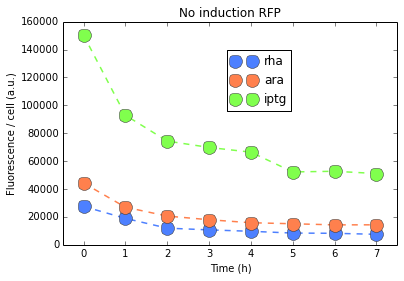

In [16]:
for P in Pidxs:
    pl.plot(np.mean(np.array(Normd_rfp[P][allCols('ZeroC')])[:8], axis=1) / 
            np.mean(np.array( oddata[ODorganization[P]][:8] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.title('No induction RFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,7.5)
pl.ylabel('Fluorescence / cell (a.u.)')
#pl.ylim(700,1400)
pl.legend(bbox_to_anchor=(0.7, 0.9))
pl.show()

Average level of activity:

In [17]:
ZC = {}
for P in Pidxs:
    ZC[P]  = np.mean(np.array(fldata[P][allCols('ZeroC')]), axis=1)[:8] \
    /np.mean(np.array( oddata[ODorganization[P]][:8] ), axis=1)[:8]

print "Avg level Rhamnose  =  %5.1f" % ( ZC['rha'].mean() )
print "Avg level IPTG      =  %5.1f" % ( ZC['iptg'].mean() )
print "Avg level Arabinose =  %5.1f" % ( ZC['ara'].mean() )

Avg level Rhamnose  =  2321.7
Avg level IPTG      =  7562.7
Avg level Arabinose =  2838.6


Rhamnose and Arabinose show similar levels of basal expression, while IPTG shows a rather high level!

In [18]:
print "Rha - Ara  =  %5.1f" % ( np.abs( ZC['rha'] - ZC['ara']  ).mean() )
print "Rha - IPTG =  %5.1f" % ( np.abs( ZC['rha'] - ZC['iptg'] ).mean() )
print "Ara - IPTG =  %5.1f" % ( np.abs( ZC['ara'] - ZC['iptg'] ).mean() )

Rha - Ara  =  517.0
Rha - IPTG =  5241.0
Ara - IPTG =  4724.1


### Preparing and normalizing promoter data

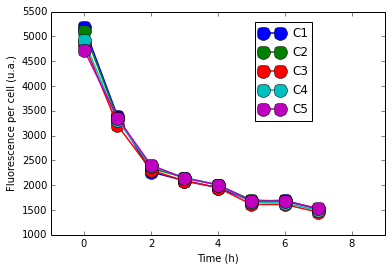

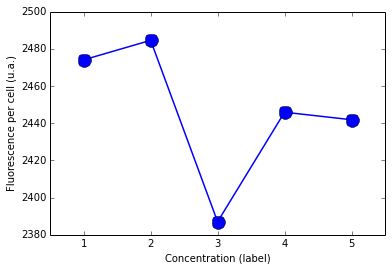

In [20]:
P = 'rha'
mds = []
for j in ['C1', 'C2', 'C3', 'C4', 'C5']:
    Cj_ts = np.mean(np.array(fldata[P][allCols(j)]), axis=1)/np.mean(np.array( oddata[ODorganization[P]][:8] ), axis=1)
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    
pl.xlim(-1,9)
pl.xlabel('Time (h)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()


pl.plot(range(1,6), mds, 'o-', lw=1.5, markersize=13.)
pl.xlim(0.5,5.5)
pl.xlabel('Concentration (label)')
#pl.ylim(3000, 3500)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.show()

### Possible error...

We have not recorded ODs for induced colonies. However, our cytometry study shows that OD of induced iptg sample *did not* grow, which makes somehow sense. In this sense, let's test *not* normalize our fluorescence with OD.

In [21]:
def activitySummary(P, ax1yi = [0.7,1.3], ax2yi = [0.7,1.1], ax3yi = [0.8, 1.4]):
    
    f, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize=(14,3.5))
    
    ZeroLevel = np.mean(np.array(fldata[P][allCols('ZeroC')]), axis=1).mean()
    mds = [1]
    ZeroLevelr = np.mean(np.array(fldata_rfp[P][allCols('ZeroC')]), axis=1).mean()
    mdsr = [1]
    
    for j in ['C1', 'C2', 'C3', 'C4', 'C5']:
        Cj_ts = np.mean(np.array(fldata[P][allCols(j)]), axis=1)/ZeroLevel
        Cj_tsr = np.mean(np.array(fldata_rfp[P][allCols(j)]), axis=1)/ZeroLevelr
        ax1.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
        ax2.plot( Cj_tsr, 'o-', lw=1.5, markersize=13., label=j)
        mds.append( Cj_ts[2:].mean() )
        mdsr.append( Cj_tsr[2:].mean() )
        
    ax1.set_xlim(-1,9)
    ax2.set_xlim(-1,9)
    ax1.set_xlabel('Time (h)')
    ax2.set_xlabel('Time (h)')
    ax1.set_ylim(ax1yi)
    ax2.set_ylim(ax2yi)
    ax1.set_ylabel('Normalized Fluorescence (u.a.)')
    ax1.legend(bbox_to_anchor=(1.1, 0.))
    
    ax3.bar(np.array(range(0,6)) - 0.4, mds, 0.8, color=(0.5,0.7,1.0))
    ax3.set_xlim(-1.,6)
    ax3.set_xlabel('Concentration (label)')
    ax3.set_ylim(ax3yi)
    ax3.set_ylabel('Fluorescence (u.a.)')
    
    pl.show()
    
    return

Rhamnose


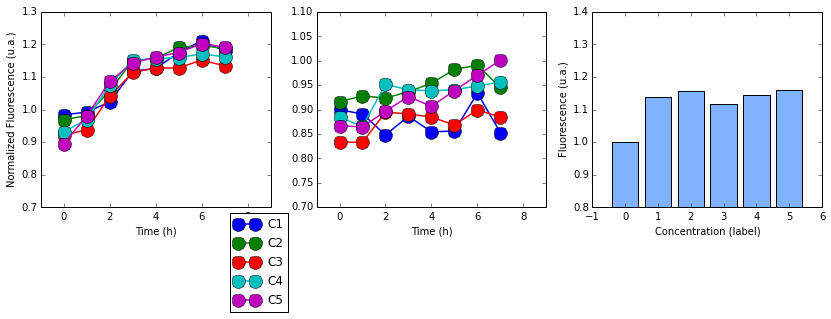

In [22]:
print 'Rhamnose'
activitySummary('rha', ax1xi = [0.7,1.3], ax2xi = [0.7,1.1], ax3yi = [0.8, 1.4])

Arabinose


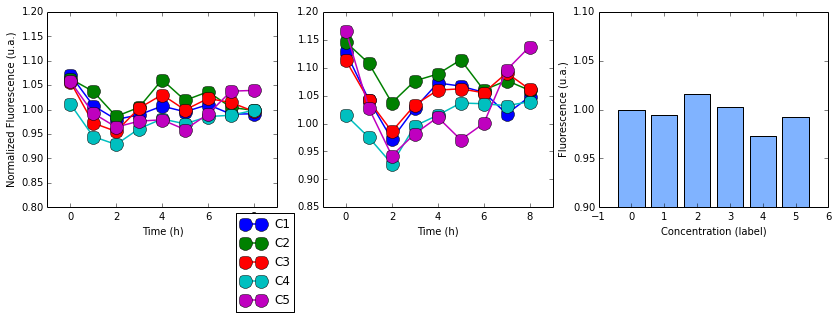

In [23]:
print 'Arabinose'
activitySummary('ara', ax1xi = [0.8,1.2], ax2xi = [0.85,1.2], ax3yi = [0.9, 1.1])

IPTG


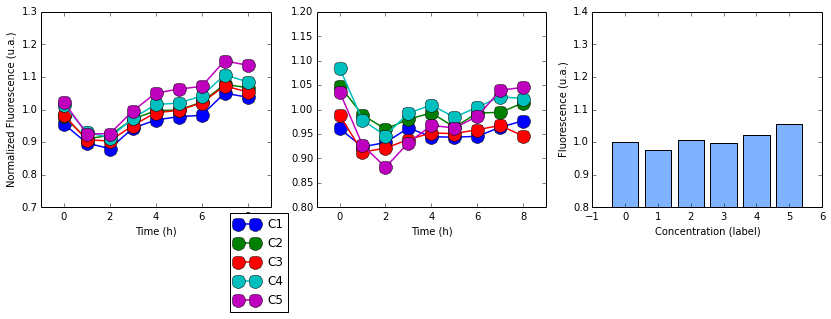

In [24]:
print 'IPTG'
activitySummary('iptg', ax1xi = [0.7,1.3], ax2xi = [0.8,1.2], ax3yi = [0.8, 1.4])

### Normalizing with the Zero-Level

Since it seems there are no differences with respect to concentrations and the fluorescence levels seem very similar to the zero levels, **from now on we will use fluorescence normalized by the Zero-Concentration fluorescence**.

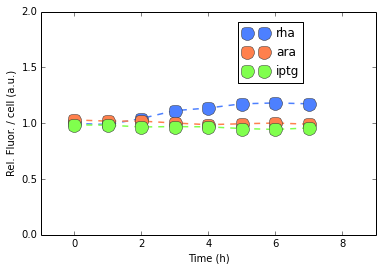

In [25]:
for P in Pidxs:
    pl.plot( 
        np.mean(np.array(fldata[P][allCols('C1')]), axis=1)[:8] / 
        np.mean(np.array( oddata[ODorganization[P]] )[:8], axis=1) / ZC[P], 
       'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Rel. Fluor. / cell (a.u.)')
pl.ylim(0,2)
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()

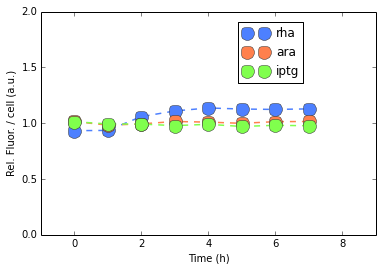

In [26]:
for P in Pidxs:
    pl.plot( 
        np.mean(np.array(fldata[P][allCols('C3')]), axis=1)[:8] / 
        np.mean(np.array( oddata[ODorganization[P]] )[:8], axis=1) / ZC[P], 
       'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Rel. Fluor. / cell (a.u.)')
pl.ylim(0,2)
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()

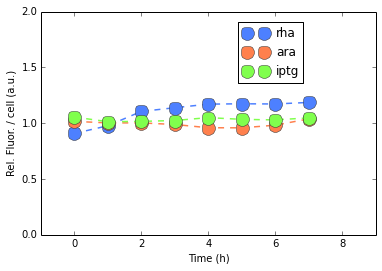

In [27]:
for P in Pidxs:
    pl.plot( 
        np.mean(np.array(fldata[P][allCols('C5')]), axis=1)[:8] / 
        np.mean(np.array( oddata[ODorganization[P]] )[:8], axis=1) / ZC[P], 
       'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Rel. Fluor. / cell (a.u.)')
pl.ylim(0,2)
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()

### Comparing Averages vs Concentration

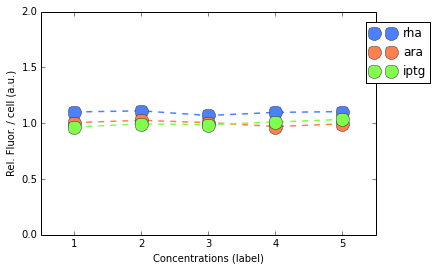

In [28]:
Means = {}
for P in Pidxs:
    Means[P] = []
X = range(1,6)

for j in ['C1','C2','C3','C4','C5']:
    for P in Pidxs:
        Means[P].append( 
            ( np.mean(np.array(fldata[P][allCols(j)]), axis=1)[:8] /
             np.mean(np.array( oddata[ODorganization[P]] ), axis=1)[:8] / ZC[P] ).mean()
        )

for P in Pidxs:
    pl.plot( X,Means[P], 'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlim(0.5,5.5)
pl.xlabel('Concentrations (label)')
pl.ylim(0,2)
pl.ylabel('Rel. Fluor. / cell (a.u.)')
pl.legend(bbox_to_anchor=(1.18, 0.98))
pl.show()

Notice the scale is quite large. IPTG seems to be the one with optimal expression.